 로지스틱 회귀(Logistic Regression)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression   #선형모델
from sklearn.svm import LinearSVC

import mglearn

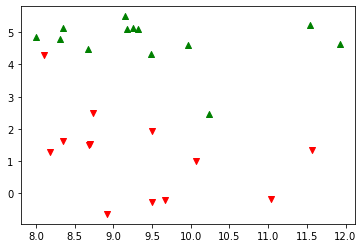

In [5]:
X, y= mglearn.datasets.make_forge()
plt.scatter(X[y==1,0], X[y==1,1], marker='^', color='green')
plt.scatter(X[y==0,0], X[y==0,1], marker='v' ,color='red')
plt.show()

0.9230769230769231
0.9230769230769231


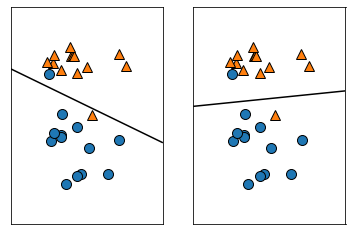

In [10]:
lr = LogisticRegression()
lr.fit(X, y)
print(lr.score(X, y))
svc = LinearSVC(max_iter=10000)    # 규제의 강도 결정LinearSVC(c="0.1") 이렇게 넣어가며 실행
svc.fit(X,y)
print(svc.score(X, y))

fig, axes = plt.subplots(1, 2)
#범용함수 아님.
for model, ax in zip([lr, svc], axes):
    mglearn.plots.plot_2d_separator(model, X , ax=ax)    #선 그려줌
    mglearn.discrete_scatter(X[:,0], X[:,1], y , ax=ax)
    
plt.show()   #결과는 같지만 판별법(알고리즘이) 다름.

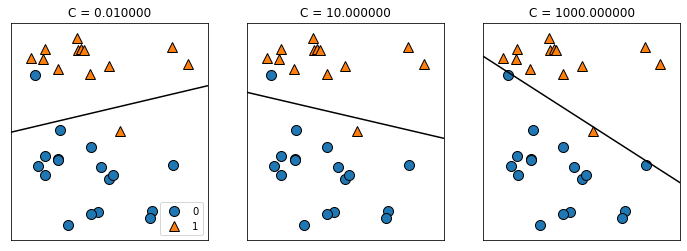

In [11]:
mglearn.plots.plot_linear_svc_regularization()

In [18]:
# 회귀
cancer = load_breast_cancer()
X, y = cancer['data'], cancer['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y ,random_state=42)

In [17]:
np.unique(y, return_counts=True)  #분류할때 구성비 비율 확인해 봐야함. 

(array([0, 1]), array([212, 357], dtype=int64))

In [22]:
for C in [0.01, 1, 100, 1000,10000]:
    lr = LogisticRegression(C=C, max_iter=10000)
    lr.fit(X_train, y_train)
    print(C, ":" ,lr.score(X_train, y_train), lr.score(X_test, y_test))

0.01 : 0.9530516431924883 0.951048951048951
1 : 0.9577464788732394 0.958041958041958
100 : 0.9835680751173709 0.965034965034965
1000 : 0.9859154929577465 0.986013986013986
10000 : 0.9859154929577465 0.972027972027972


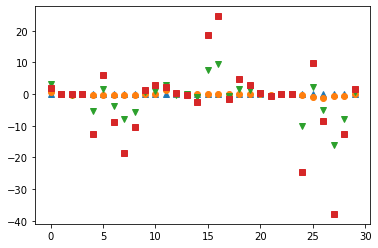

In [25]:
for C, m in zip([0.01, 1, 100, 1000], ['^', 'o', 'v', 's']):
    lr = LogisticRegression(C=C, max_iter=10000)
    lr.fit(X_train, y_train)
#     print(lr.coef_)  #2차원 배열형식, 
    plt.plot(lr.coef_[0], m)   #가중치 확인

In [30]:
for C in [0.01, 0.1, 1, 10, 100]:
    svc = LinearSVC(C=C, max_iter=1000000)    #max_iter 반복횟수
    svc.fit(X_train, y_train)
    print(C, ":" ,svc.score(X_train, y_train), svc.score(X_test, y_test))

0.01 : 0.9483568075117371 0.9440559440559441


c:\programdata\miniconda3\envs\hoseo\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.1 : 0.960093896713615 0.958041958041958


c:\programdata\miniconda3\envs\hoseo\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


1 : 0.9647887323943662 0.958041958041958


c:\programdata\miniconda3\envs\hoseo\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


10 : 0.9483568075117371 0.972027972027972
100 : 0.9413145539906104 0.951048951048951


c:\programdata\miniconda3\envs\hoseo\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression   #선형모델
from sklearn.svm import LinearSVC

import mglearn

In [34]:
ds = sm.datasets.fair.load_pandas()
data = ds.data
data   #결혼에 대한 데이터

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000


In [40]:
# (data['affairs'] == 0).sum(), data.shape[0]   #(4313, 6366)
data['affairs'] = (data['affairs'] != 0)
# data['affairs'] = data['affairs'].astype(bool)

In [42]:
# 4313/6366       #30% 이상이 특이사항 있다.

In [41]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,True
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,True
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,True
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,True
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,True


In [44]:
X = data[['rate_marriage', 'yrs_married', 'children', 'religious', 'educ']]
y = data['affairs'].astype(int).values

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [50]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train)

X_train_scaled, X_test_scaled = mms.transform(X_train), mms.transform(X_test)

In [53]:
for C in [0.01, 1, 100, 10000, 1000000]:
    lr=LogisticRegression(C=C)
    lr.fit(X_train_scaled, y_train)
#     print(lr.score(X_train, y_train), lr.score(X_test, y_test))
    print(lr.score(X_train_scaled, y_train), lr.score(X_test_scaled, y_test))

0.6971093422706326 0.6959798994974874
0.7241307080016758 0.7085427135678392
0.7245496439044826 0.7097989949748744
0.724759111855886 0.7110552763819096
0.724759111855886 0.7110552763819096


In [57]:
for C in [0.01, 1, 100, 10000]:
    svc=LinearSVC(C=C, max_iter=100000)
    svc.fit(X_train_scaled, y_train)
#     print(lr.score(X_train, y_train), lr.score(X_test, y_test))
    print(svc.score(X_train_scaled, y_train), svc.score(X_test_scaled, y_test))

0.7197318810222036 0.7091708542713567
0.7222454964390448 0.7091708542713567
0.7220360284876414 0.7091708542713567
0.718475073313783 0.7154522613065326


c:\programdata\miniconda3\envs\hoseo\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [58]:
from sklearn.datasets import load_iris

In [59]:
iris = load_iris()

In [62]:
print(iris['data'][:3], iris['target'][:3])
print(np.unique(iris['target']), iris['target_names'] )

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]] [0 0 0]
[0 1 2] ['setosa' 'versicolor' 'virginica']


In [63]:
X, y=iris['data'], iris['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [70]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train), lr.score(X_test, y_test))

lr = LogisticRegression(C=10, max_iter=10000)
lr.fit(X_train, y_train)
lr.score(X_train, y_train), lr.score(X_test, y_test)

0.9732142857142857 0.9473684210526315


(0.9910714285714286, 0.9473684210526315)

In [72]:
svc = LinearSVC(C=10, max_iter=100000)    # C = 조절기 값
svc.fit(X_train, y_train)
print(svc.score(X_train, y_train), svc.score(X_test, y_test))

0.9642857142857143 0.9736842105263158


In [76]:
print(lr.predict(X[[0, 50, 100]]), y[[0, 50, 100]] )
print(svc.predict(X[[0, 50, 100]]), y[[0, 50, 100]] )

[0 1 2] [0 1 2]
[0 1 2] [0 1 2]
